<a href="https://colab.research.google.com/github/TetaliVarshitha/WiseML/blob/main/Iris_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing necessary libraries:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

**Loading Datasets:**

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Machine Learning/Iris.csv")

In [3]:
data.shape

(150, 6)

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Extracting features and labels separately:**

In [5]:
featurenames = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
# separating features
features = data.loc[:,featurenames]

# separating target
labels = data.loc[:,'Species']

**Standardizing Features:**

In [6]:
features = StandardScaler().fit_transform(features)

In [7]:
print(features)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

**Reducing 4D to 2D:**

In [8]:
import numpy as np
pca = PCA(n_components=2)

pct = pca.fit_transform(features)

print(np.cumsum(pca.explained_variance_ratio_))
principal_df = pd.DataFrame(pct,columns=['pc1','pc2'])
display(principal_df)
finaldf = pd.concat([principal_df,labels],axis=1)

[0.72770452 0.95800975]


,pc1,pc2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [9]:
print(principal_df)

          pc1       pc2
0   -2.264542  0.505704
1   -2.086426 -0.655405
2   -2.367950 -0.318477
3   -2.304197 -0.575368
4   -2.388777  0.674767
..        ...       ...
145  1.870522  0.382822
146  1.558492 -0.905314
147  1.520845  0.266795
148  1.376391  1.016362
149  0.959299 -0.022284

[150 rows x 2 columns]


In [10]:
display(finaldf)

,pc1,pc2,Species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


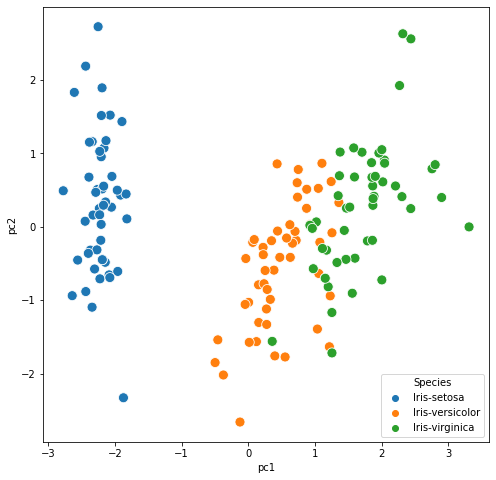

In [11]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.scatterplot('pc1', 'pc2', hue='Species', data=finaldf, s=100)
plt.show()

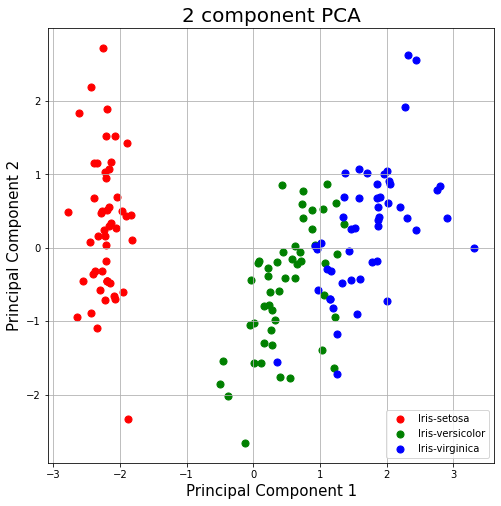

In [12]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = labels == target
    ax.scatter(finaldf.loc[indicesToKeep, 'pc1']
               , finaldf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

features = finaldf[['pc1', 'pc2']]
label = finaldf['Species']

x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.35, random_state=42, shuffle=True)
model = LogisticRegression()

model.fit(x_train, y_train)

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

print(f"Train Accuracy: {accuracy_score(y_train, train_pred)*100:.2f}")
print(f"Test Accuracy: {accuracy_score(y_test, test_pred)*100:.2f}")

Train Accuracy: 89.69
Test Accuracy: 92.45


In [15]:
x_train.shape

(97, 2)

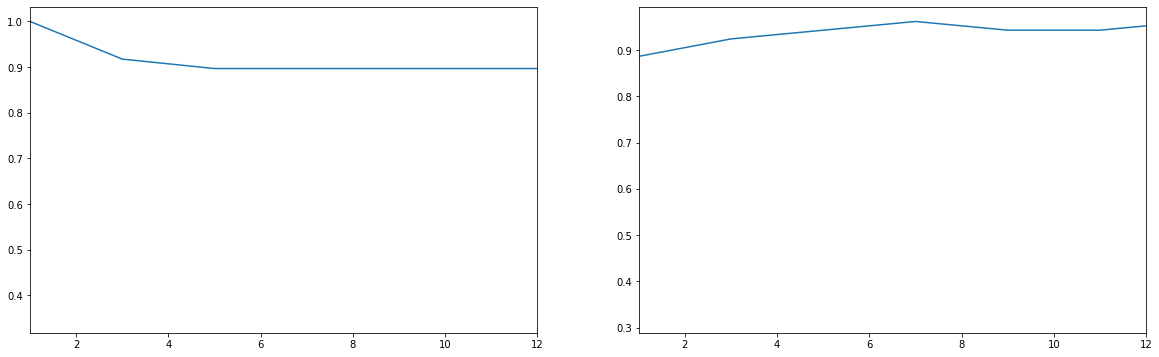

In [16]:
from sklearn.neighbors import KNeighborsClassifier

train_acc = []
test_acc = []
k_range = list(range(1, 90, 2)) 

for k in k_range:
    model = KNeighborsClassifier(k)
    model.fit(x_train, y_train)
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))
    
plt.figure(figsize=(20, 6))
plt.subplot(121)
plt.plot(k_range, train_acc)
plt.xlim(1, 12)
plt.subplot(122)
plt.plot(k_range, test_acc)
plt.xlim(1, 12)
plt.show()

In [17]:
model = KNeighborsClassifier(11)
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)
print(f"Train accuracy: {accuracy_score(y_train, y_pred_train)*100:.2f}")
print(f"Test accuracy: {accuracy_score(y_test, y_pred_test)*100:.2f}")

Train accuracy: 89.69
Test accuracy: 94.34
